# Opening

Hi, I am Abu Hanif Muhammad Syarubany. In this project, we will do some hypertuning parameter to build Fire forest estimator using Artificial Neural Network

# Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.keras.metrics.MeanSquaredError(name="mean_squared_error", dtype=None)
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
import pandas_profiling as pp 
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_squared_error
import seaborn as sns
import plotly.tools as tls
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Preparing Data

In [2]:
data=pd.read_csv("forestfires.csv")

In [3]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [5]:
pp.ProfileReport(data)

In [6]:
data["month"].describe()

count     517
unique     12
top       aug
freq      184
Name: month, dtype: object

In [7]:
data[["month"]].describe()

,month
count,517
unique,12
top,aug
freq,184


In [8]:
data.groupby(["day"]).area.mean()

day
fri     5.261647
mon     9.547703
sat    25.534048
sun    10.104526
thu    16.345902
tue    12.621719
wed    10.714815
Name: area, dtype: float64

In [9]:
data.groupby(["month"]).area.mean()

month
apr     8.891111
aug    12.489076
dec    13.330000
feb     6.275000
jan     0.000000
jul    14.369687
jun     5.841176
mar     4.356667
may    19.240000
nov     0.000000
oct     6.638000
sep    17.942616
Name: area, dtype: float64

In [10]:
pd.concat([data,pd.get_dummies(data[["month","day"]])],ignore_index=True)

,DC,DMC,FFMC,ISI,RH,X,Y,area,day,day_fri,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,rain,temp,wind
0,94.3,26.2,86.2,5.1,51.0,7.0,5.0,0.0,fri,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.2,6.7
1,669.1,35.4,90.6,6.7,33.0,7.0,4.0,0.0,tue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.0,0.9
2,686.9,43.7,90.6,6.7,33.0,7.0,4.0,0.0,sat,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14.6,1.3
3,77.5,33.3,91.7,9.0,97.0,8.0,6.0,0.0,fri,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,8.3,4.0
4,102.2,51.3,89.3,9.6,99.0,8.0,6.0,0.0,sun,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.4,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [11]:
dataku = pd.concat([data, pd.get_dummies(data[["month","day"]])], axis=1)
dataku=dataku.drop(["month","day"],axis=1)

In [12]:
dataku

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


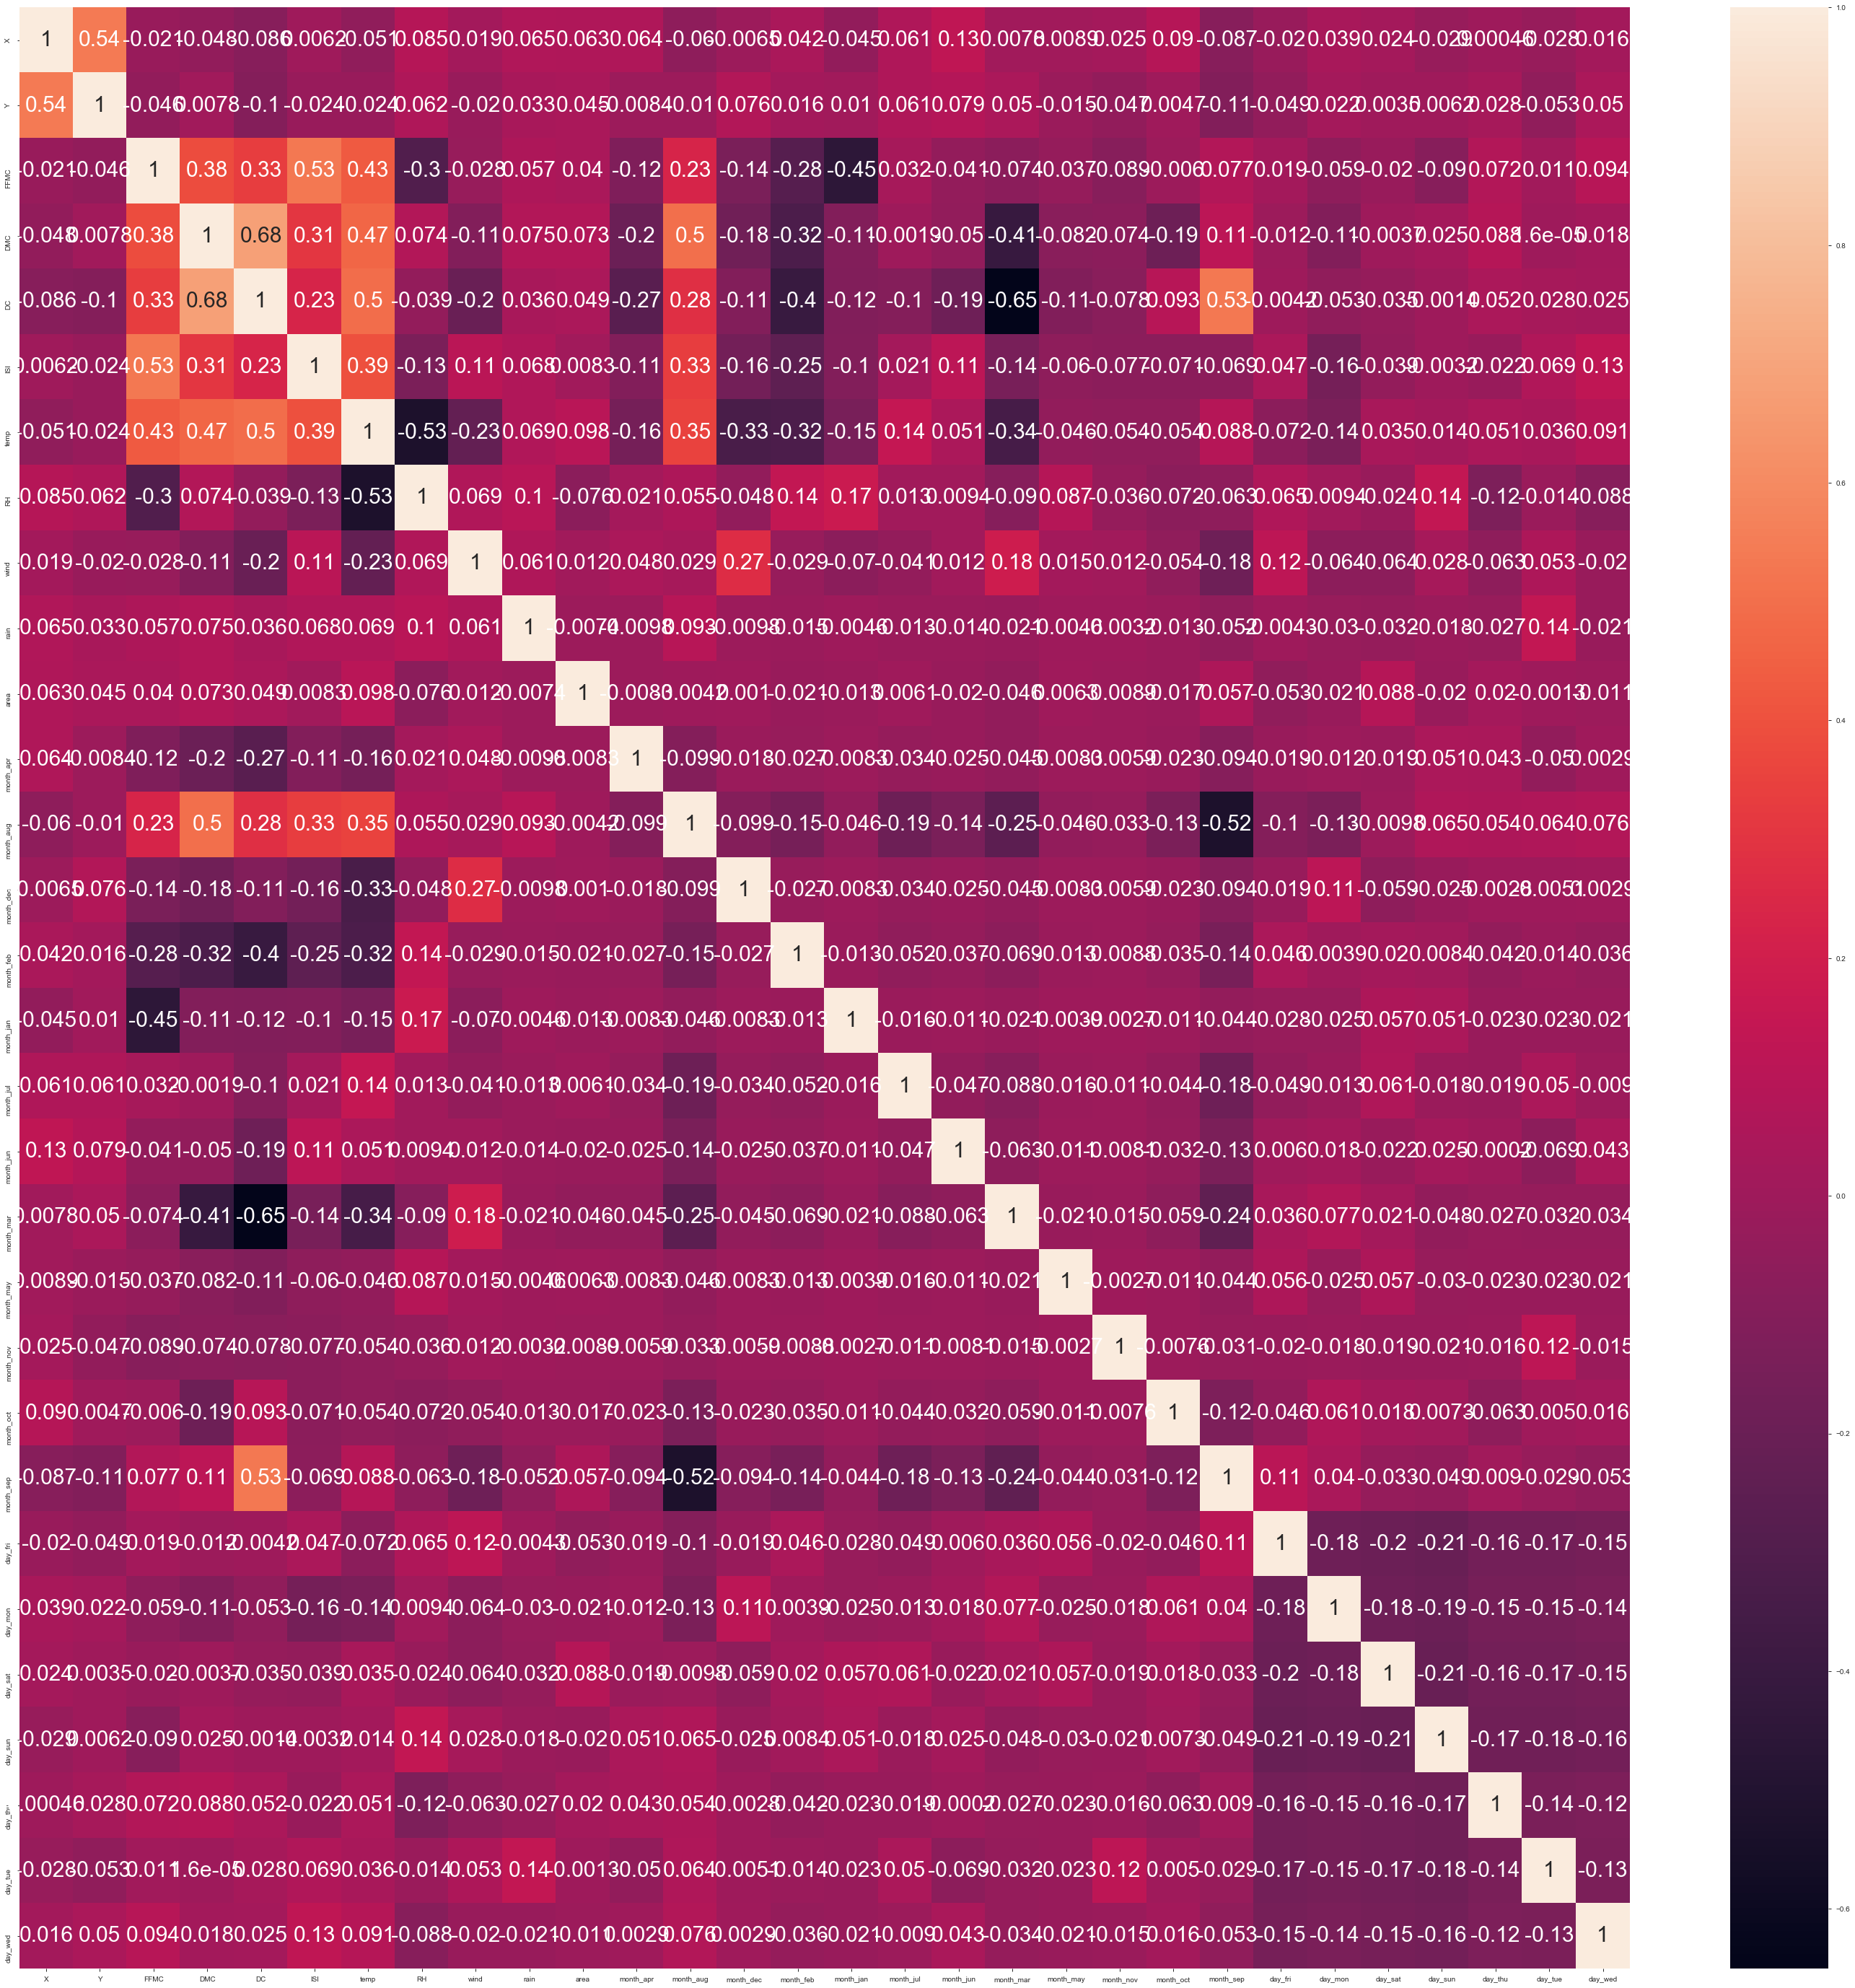

In [13]:
import seaborn as sns
plt.figure(figsize=(50,50))
sns.heatmap(dataku.corr(),annot=True,annot_kws={"size":30})

In [14]:
dataku.area.describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

In [15]:
dataku.groupby(["area","rain"]).describe()

X                                                     Y  \
              count      mean       std  min   25%  50%   75%  max  count   
area    rain                                                                
0.00    0.0   241.0  4.460581  2.217239  1.0  3.00  4.0  6.00  9.0  241.0   
        0.2     2.0  7.500000  0.707107  7.0  7.25  7.5  7.75  8.0    2.0   
        0.4     1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0    1.0   
        0.8     2.0  7.500000  0.707107  7.0  7.25  7.5  7.75  8.0    2.0   
        1.0     1.0  7.000000       NaN  7.0  7.00  7.0  7.00  7.0    1.0   
...             ...       ...       ...  ...   ...  ...   ...  ...    ...   
200.94  0.0     1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0    1.0   
212.88  0.0     1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0    1.0   
278.53  0.0     1.0  7.000000       NaN  7.0  7.00  7.0  7.00  7.0    1.0   
746.28  0.0     1.0  8.000000       NaN  8.0  8.00  8.0  8.00  8.0    1.0   
1090.84 0.0     1.0  6.000000       NaN  6.0  6.00  6.0  6.00  6.0    1.0   

                       ... day_tue      day_wed                           \
                 mean  ...     75%  max   count      mean       std  min   
area    rain           ...                                                 
0.00    0.0   4.20332  ...     0.0  1.0   241.0  0.087137  0.282623  0.0   
        0.2   6.00000  ...     0.0  0.0     2.0  0.500000  0.707107  0.0   
        0.4   4.00000  ...     1.0  1.0     1.0  0.000000       NaN  0.0   
        0.8   5.50000  ...     1.0  1.0     2.0  0.000000  0.000000  0.0   
        1.0   4.00000  ...     0.0  0.0     1.0  0.000000       NaN  0.0   
...               ...  ...     ...  ...     ...       ...       ...  ...   
200.94  0.0   2.00000  ...     0.0  0.0     1.0  0.000000       NaN  0.0   
212.88  0.0   2.00000  ...     1.0  1.0     1.0  0.000000       NaN  0.0   
278.53  0.0   4.00000  ...     0.0  0.0     1.0  0.000000       NaN  0.0   
746.28  0.0   6.00000  ...     0.0  0.0     1.0  0.000000       NaN  0.0   
1090.84 0.0   5.00000  ...     0.0  0.0     1.0  0.000000       NaN  0.0   

                                    
               25%  50%   75%  max  
area    rain                        
0.00    0.0   0.00  0.0  0.00  1.0  
        0.2   0.25  0.5  0.75  1.0  
        0.4   0.00  0.0  0.00  0.0  
        0.8   0.00  0.0  0.00  0.0  
        1.0   0.00  0.0  0.00  0.0  
...            ...  ...   ...  ...  
200.94  0.0   0.00  0.0  0.00  0.0  
212.88  0.0   0.00  0.0  0.00  0.0  
278.53  0.0   0.00  0.0  0.00  0.0  
746.28  0.0   0.00  0.0  0.00  0.0  
1090.84 0.0   0.00  0.0  0.00  0.0  

[255 rows x 224 columns]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

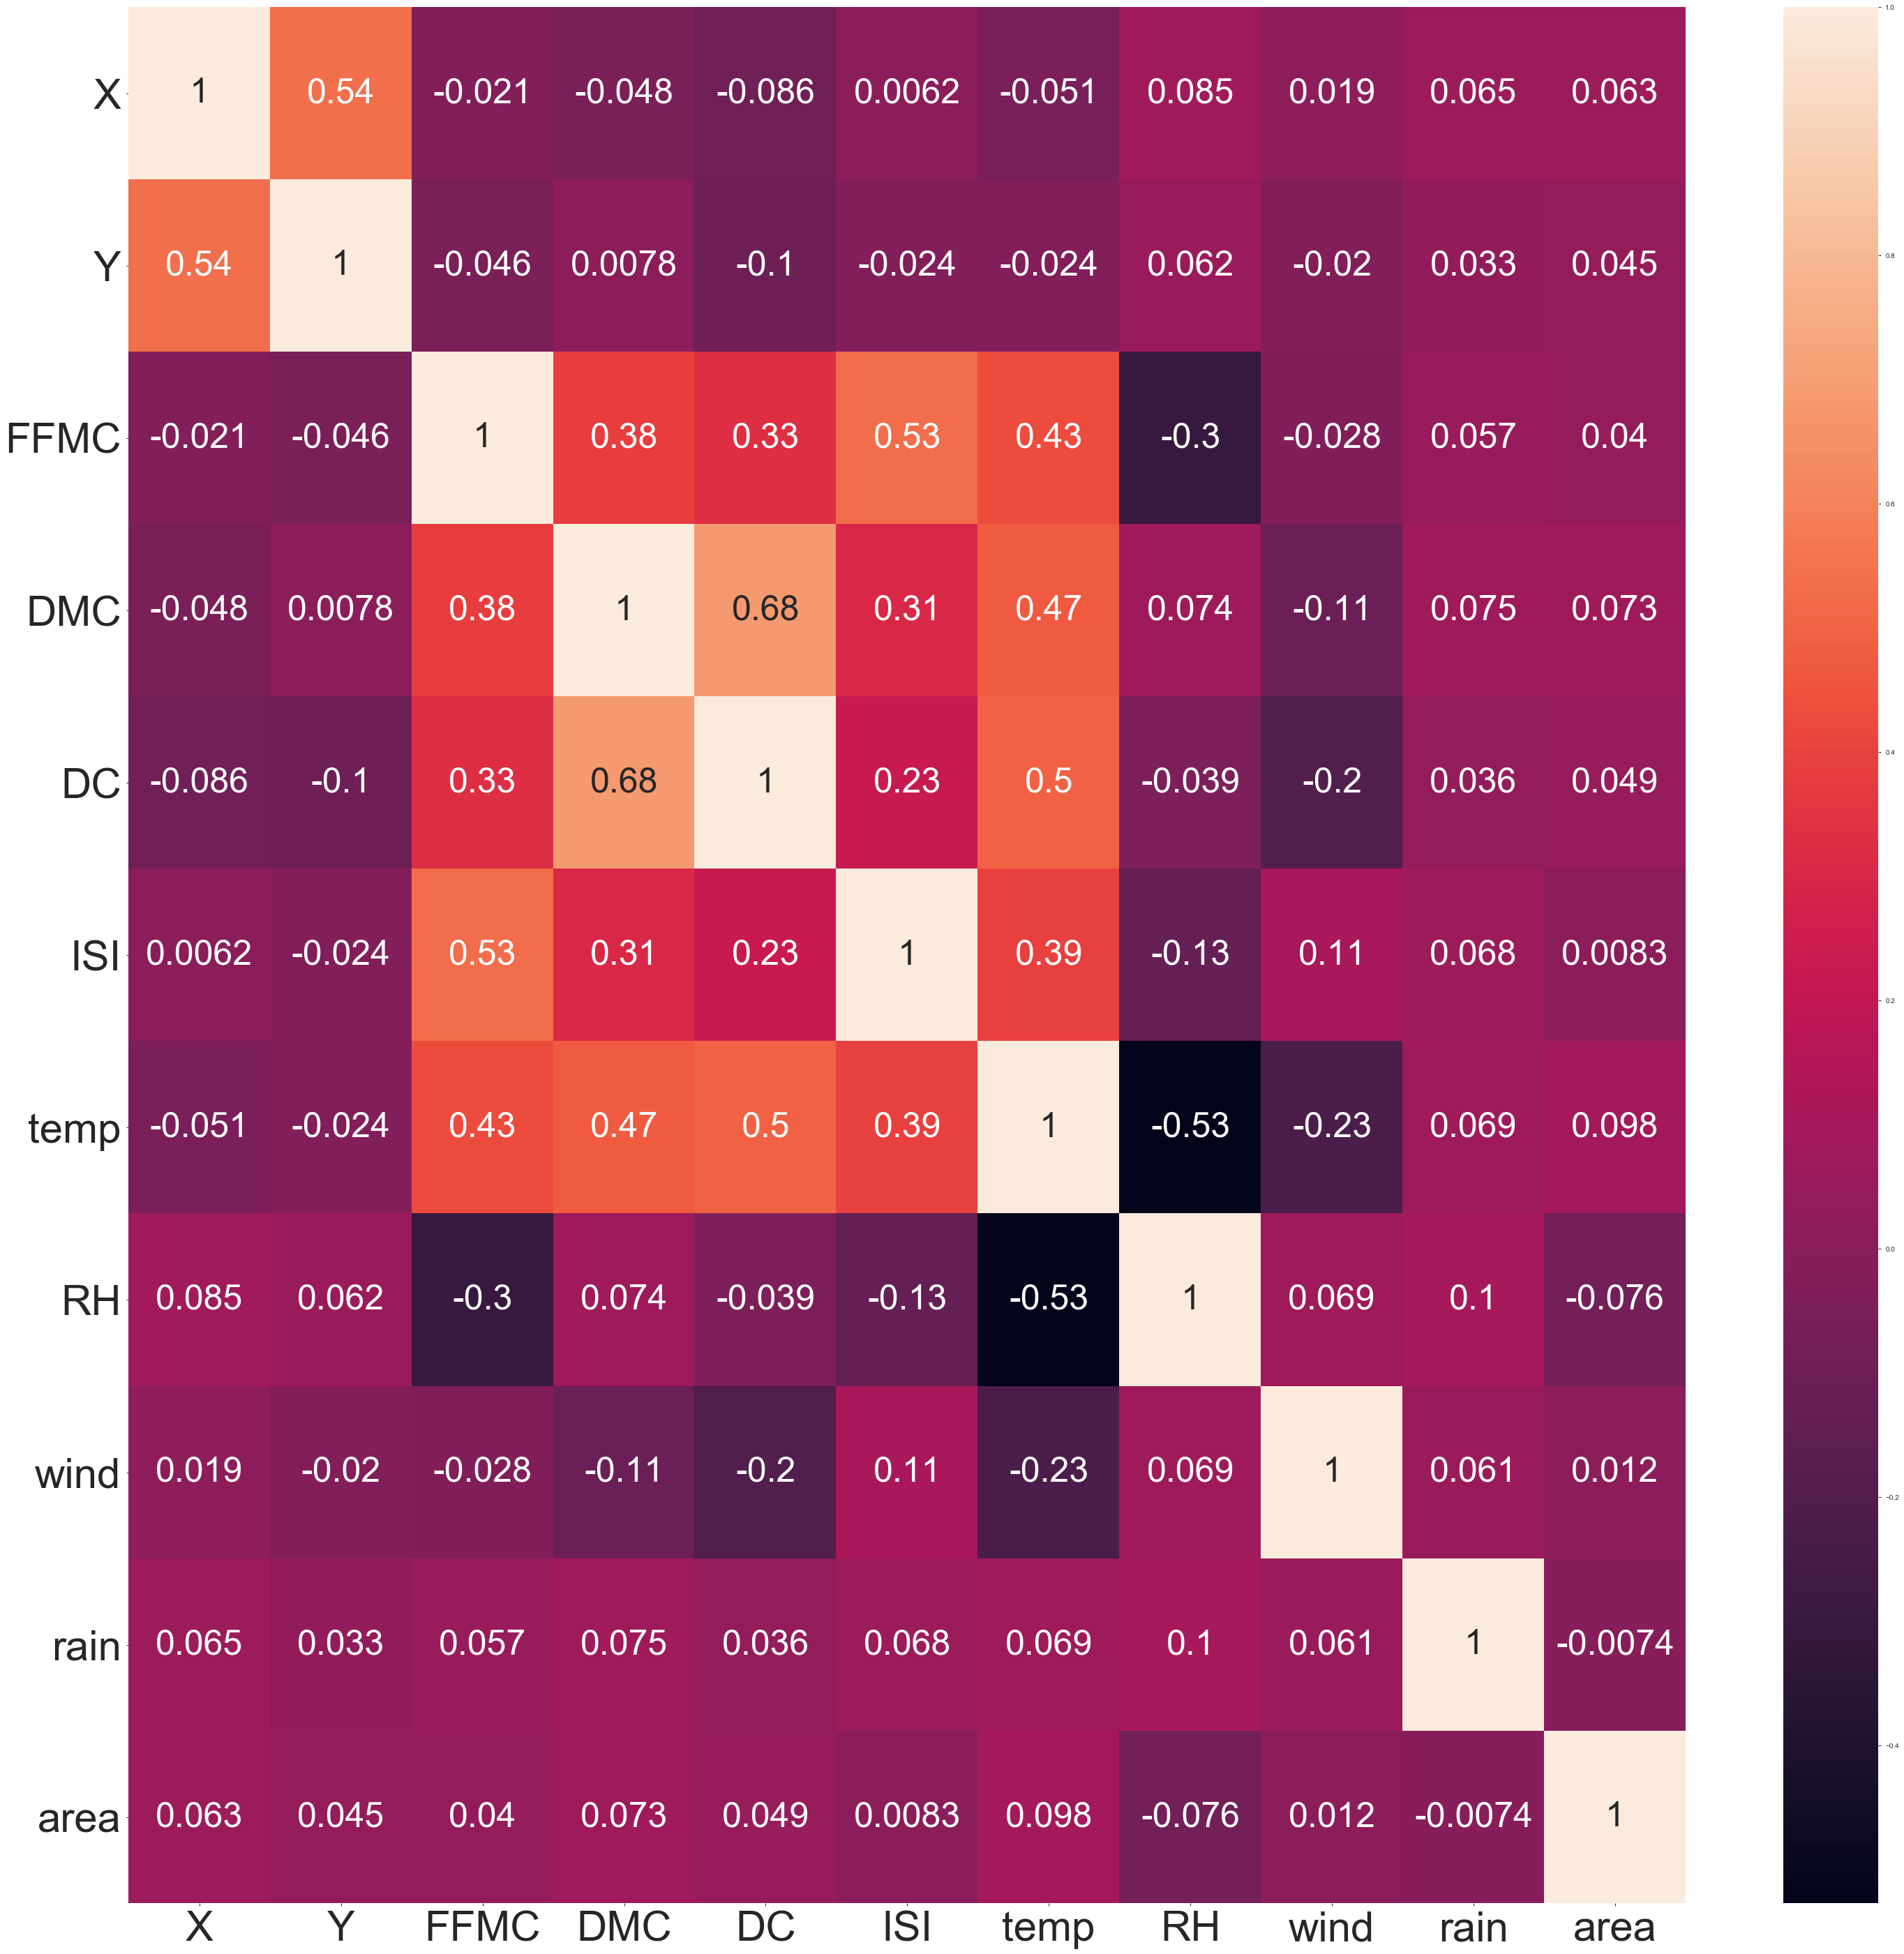

In [16]:
plt.figure(figsize=(50,50))
sns.heatmap(data.corr(),annot=True,annot_kws={"size":50})
plt.xticks(fontsize=60,rotation=0)
plt.yticks(fontsize=60,rotation=0)

In [17]:
X=dataku.drop(["area"],axis=1)
y=dataku["area"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)

RandomForestRegressor()

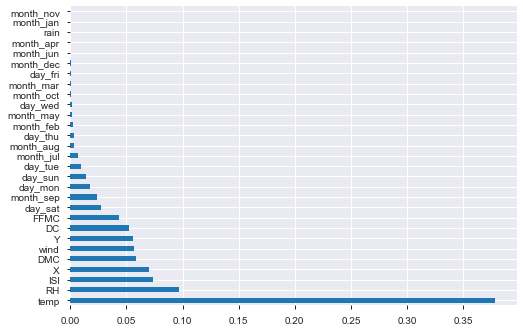

In [18]:
importance_scores = rf_clf.feature_importances_
indices = np.argsort(importance_scores)

feature_importances = pd.Series(rf_clf.feature_importances_,index=X.columns)
feature_importances.nlargest(49).plot(kind='barh')

In [19]:
data.loc[data.area==0]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


In [20]:
data2=pd.read_csv("forestfires.csv")

In [21]:
data2

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [22]:
data2[["month","area"]].groupby(["month"]).describe()

area                                                            
       count       mean        std   min   25%     50%      75%      max
month                                                                   
apr      9.0   8.891111  19.929092  0.00  0.00   0.000   4.6100    61.13
aug    184.0  12.489076  60.364174  0.00  0.00   0.545   5.0275   746.28
dec      9.0  13.330000   6.610747  5.38  9.27  10.730  17.8500    24.77
feb     20.0   6.275000  12.342510  0.00  0.00   0.550   6.4950    51.78
jan      2.0   0.000000   0.000000  0.00  0.00   0.000   0.0000     0.00
jul     32.0  14.369687  50.849299  0.00  0.00   1.035   6.3675   278.53
jun     17.0   5.841176  16.884945  0.00  0.00   0.000   3.1900    70.32
mar     54.0   4.356667   9.140107  0.00  0.00   0.000   3.0175    36.85
may      2.0  19.240000  27.209469  0.00  9.62  19.240  28.8600    38.48
nov      1.0   0.000000        NaN  0.00  0.00   0.000   0.0000     0.00
oct     15.0   6.638000  13.699522  0.00  0.00   0.000   6.1350    49.37
sep    172.0  17.942616  87.648175  0.00  0.00   1.360   7.5600  1090.84

In [23]:
panas=["jun","jul","aug","sep"]
gugur=["oct","nov"]
dingin=["dec","jan","feb"]
semi=["mar","apr","may"]

musim=[]
for i in range(data2.shape[0]):
    if (data2["month"][i]) in panas:
        musim.append("panas")
    if (data2["month"][i]) in gugur:
        musim.append("gugur")
    if (data2["month"][i]) in dingin:
        musim.append("dingin")
    if (data2["month"][i]) in semi:
        musim.append("semi")
data2["musim"]=musim

In [24]:
data2

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,musim
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,semi
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,gugur
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,gugur
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,semi
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,semi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,panas
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,panas
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,panas
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,panas


In [25]:
data2[["musim","area"]].groupby(["musim"]).describe()

area                                                        
        count       mean        std  min  25%   50%      75%      max
musim                                                                
dingin   31.0   7.918387  11.086051  0.0  0.0  5.38  10.3450    51.78
gugur    16.0   6.223125  13.338630  0.0  0.0  0.00   5.7875    49.37
panas   405.0  14.674691  71.567324  0.0  0.0  0.75   6.4300  1090.84
semi     65.0   5.442462  11.790392  0.0  0.0  0.00   4.6100    61.13

In [26]:
data2[["day","area"]].groupby(["day"]).describe()

area                                                         
    count       mean         std  min  25%    50%     75%      max
day                                                               
fri  85.0   5.261647   10.012083  0.0  0.0  0.330  5.9700    43.32
mon  74.0   9.547703   33.703562  0.0  0.0  0.745  6.0325   278.53
sat  84.0  25.534048  122.698840  0.0  0.0  0.340  7.5500  1090.84
sun  95.0  10.104526   26.076032  0.0  0.0  0.000  6.8150   196.48
thu  61.0  16.345902   95.351052  0.0  0.0  0.900  4.9500   746.28
tue  64.0  12.621719   33.568193  0.0  0.0  0.655  8.8500   212.88
wed  54.0  10.714815   30.285914  0.0  0.0  0.760  5.7825   185.76

In [27]:
weekday=["mon","tue","wed","thu","fri"]
weekend=["sat","sun"]
week=[]
for i in range(data2.shape[0]):
    if data2["day"][i] in weekday:
        week.append("weekday")
    if data2["day"][i] in weekend:
        week.append("weekend")
data2["week"]=week

In [28]:
data2

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,musim,week
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,semi,weekday
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,gugur,weekday
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,gugur,weekend
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,semi,weekday
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,semi,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,panas,weekend
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,panas,weekend
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,panas,weekend
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,panas,weekend


In [29]:
data2[["week","area"]].groupby(["week"]).describe()

area                                                      
         count       mean        std  min  25%   50%    75%      max
week                                                                
weekday  338.0  10.465266  47.527296  0.0  0.0  0.58  6.085   746.28
weekend  179.0  17.345196  86.248108  0.0  0.0  0.00  7.275  1090.84

In [30]:
for item in data2.columns:
    if not(item in ["month","day","musim","week"]):
        data2[item] = np.log(data2[item]+1)

In [31]:
data2

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,musim,week
0,2.079442,1.791759,mar,fri,4.468204,3.303217,4.557030,1.808289,2.219203,3.951244,2.041220,0.000000,0.000000,semi,weekday
1,2.079442,1.609438,oct,tue,4.517431,3.594569,6.507427,2.041220,2.944439,3.526361,0.641854,0.000000,0.000000,gugur,weekday
2,2.079442,1.609438,oct,sat,4.517431,3.799974,6.533643,2.041220,2.747271,3.526361,0.832909,0.000000,0.000000,gugur,weekend
3,2.197225,1.945910,mar,fri,4.529368,3.535145,4.363099,2.302585,2.230014,4.584967,1.609438,0.182322,0.000000,semi,weekday
4,2.197225,1.945910,mar,sun,4.503137,3.956996,4.636669,2.360854,2.517696,4.605170,1.029619,0.000000,0.000000,semi,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1.609438,1.386294,aug,sun,4.414010,4.055257,6.502190,1.064711,3.360375,3.496508,1.308333,0.000000,2.006871,panas,weekend
513,1.098612,1.609438,aug,sun,4.414010,4.055257,6.502190,1.064711,3.131137,4.276666,1.916923,0.000000,4.012592,panas,weekend
514,2.079442,1.609438,aug,sun,4.414010,4.055257,6.502190,1.064711,3.100092,4.262680,2.041220,0.000000,2.498152,panas,weekend
515,0.693147,1.609438,aug,sat,4.558079,4.990433,6.422760,2.509599,3.280911,3.761200,1.609438,0.000000,0.000000,panas,weekend


In [32]:
data2 = pd.concat([data2, pd.get_dummies(data2[["musim"]])], axis=1)
data2["week"]=data2.week.map({"weekday":0,"weekend":1})
data2=data2.drop(["month","day","musim"],axis=1)
data2=data2.drop(["rain"],axis=1)

In [33]:
data2

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area,week,musim_dingin,musim_gugur,musim_panas,musim_semi
0,2.079442,1.791759,4.468204,3.303217,4.557030,1.808289,2.219203,3.951244,2.041220,0.000000,0,0,0,0,1
1,2.079442,1.609438,4.517431,3.594569,6.507427,2.041220,2.944439,3.526361,0.641854,0.000000,0,0,1,0,0
2,2.079442,1.609438,4.517431,3.799974,6.533643,2.041220,2.747271,3.526361,0.832909,0.000000,1,0,1,0,0
3,2.197225,1.945910,4.529368,3.535145,4.363099,2.302585,2.230014,4.584967,1.609438,0.000000,0,0,0,0,1
4,2.197225,1.945910,4.503137,3.956996,4.636669,2.360854,2.517696,4.605170,1.029619,0.000000,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1.609438,1.386294,4.414010,4.055257,6.502190,1.064711,3.360375,3.496508,1.308333,2.006871,1,0,0,1,0
513,1.098612,1.609438,4.414010,4.055257,6.502190,1.064711,3.131137,4.276666,1.916923,4.012592,1,0,0,1,0
514,2.079442,1.609438,4.414010,4.055257,6.502190,1.064711,3.100092,4.262680,2.041220,2.498152,1,0,0,1,0
515,0.693147,1.609438,4.558079,4.990433,6.422760,2.509599,3.280911,3.761200,1.609438,0.000000,1,0,0,1,0


In [34]:
X=data2.drop(["area"],axis=1)
y=data2["area"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

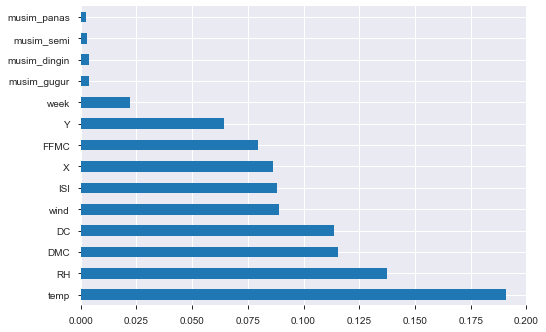

In [35]:
rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)

importance_scores = rf_clf.feature_importances_
indices = np.argsort(importance_scores)

feature_importances = pd.Series(rf_clf.feature_importances_,index=X.columns)
feature_importances.nlargest(29).plot(kind='barh')

# Tuning Epochs

In [36]:
# fit a model and plot learning curve
def tuning_epochs(X_train, y_train, X_test, y_test, n_epoch):
    # define model
    model = Sequential()
    model.add(Dense(100, input_dim=14, activation='relu', kernel_initializer='normal'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='relu'))

    # compile model
    opt = SGD(lr=0.0001, momentum=0.9)
    model.compile(loss='mse', optimizer=opt)
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_epoch, verbose=0, batch_size=len(X_train))
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('epoch='+str(n_epoch))
    plt.legend()

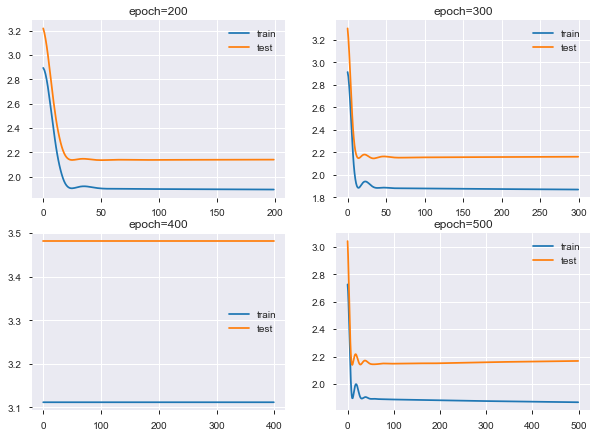

In [37]:
# create learning curves for different batch sizes
epochs = [200,300,400,500]

plt.figure(figsize=(10, 15))
for i in range(len(epochs)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    tuning_epochs(X_train, y_train, X_test, y_test, epochs[i])

# show learning curves
plt.show()

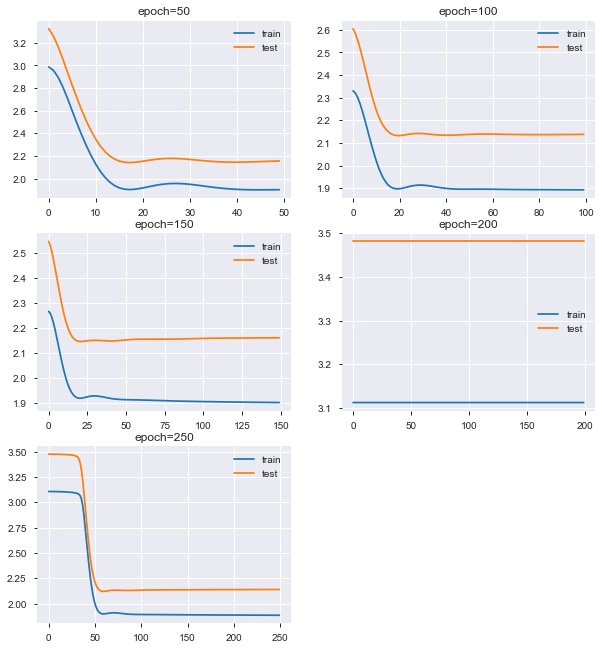

In [38]:
# create learning curves for different batch sizes
epochs = [50,100,150,200,250]

plt.figure(figsize=(10, 15))
for i in range(len(epochs)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    tuning_epochs(X_train, y_train, X_test, y_test, epochs[i])

# show learning curves
plt.show()

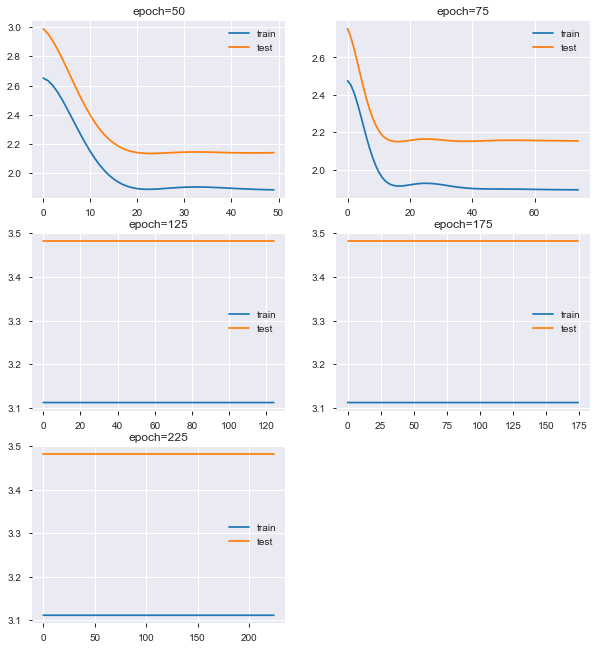

In [39]:
# create learning curves for different batch sizes
epochs = [50,75,125,175,225]

plt.figure(figsize=(10, 15))
for i in range(len(epochs)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    tuning_epochs(X_train, y_train, X_test, y_test, epochs[i])

# show learning curves
plt.show()

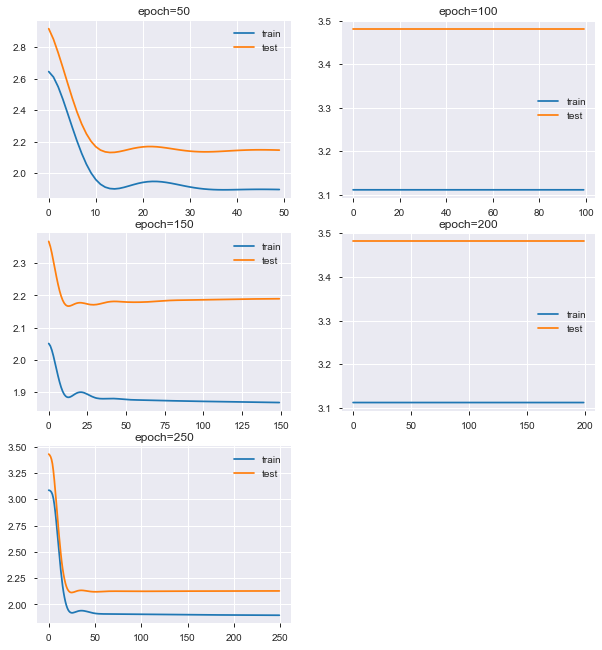

In [40]:
# create learning curves for different batch sizes
epochs = [50,100,150,200,250]

plt.figure(figsize=(10, 15))
for i in range(len(epochs)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    tuning_epochs(X_train, y_train, X_test, y_test, epochs[i])

# show learning curves
plt.show()

# Tuning Batch

In [41]:
# fit a model and plot learning curve
def tuning_batch(X_train, y_train, X_test, y_test, n_batch):
    # define model
    model = Sequential()
    model.add(Dense(100, input_dim=14, activation='relu', kernel_initializer='normal'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='relu'))

    # compile model
    opt = SGD(lr=0.0001, momentum=0.9)
    model.compile(loss='mse', optimizer=opt)
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, verbose=0, batch_size=n_batch)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('n_batch='+str(n_batch))
    plt.legend()

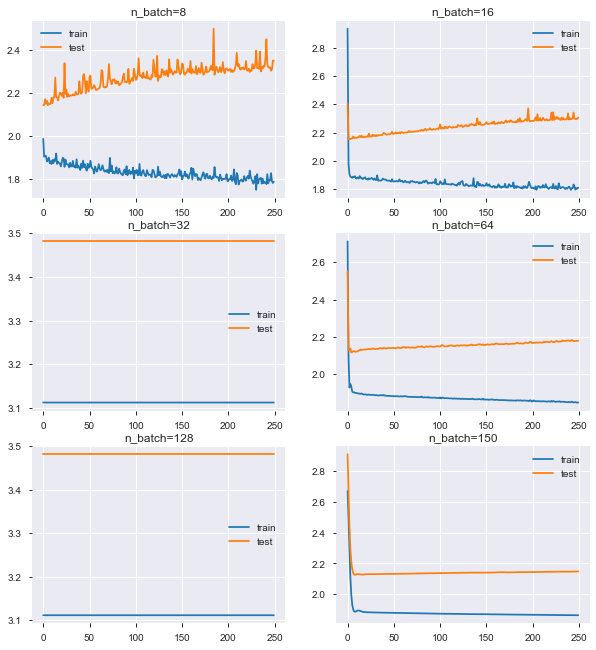

In [42]:
# create learning curves for different batch sizes
batch = [8,16,32,64,128,150]

plt.figure(figsize=(10, 15))
for i in range(len(batch)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    tuning_batch(X_train, y_train, X_test, y_test, batch[i])

# show learning curves
plt.show()

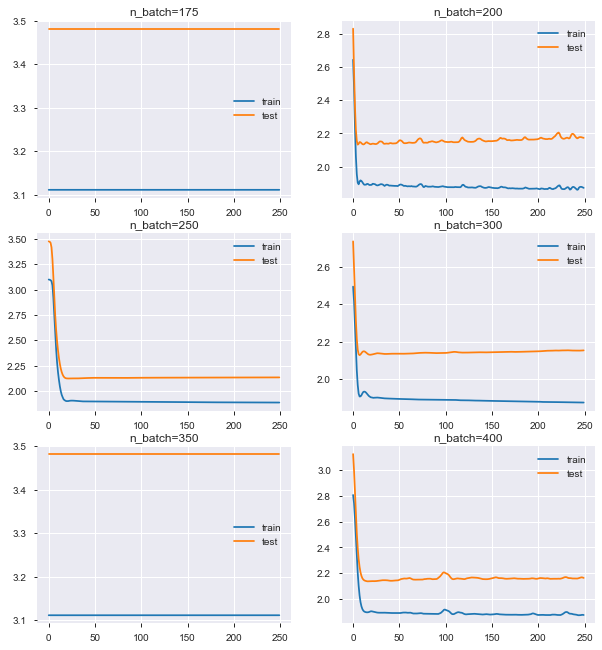

In [43]:
# create learning curves for different batch sizes
batch = [175,200,250,300,350,400]

plt.figure(figsize=(10, 15))
for i in range(len(batch)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    tuning_batch(X_train, y_train, X_test, y_test, batch[i])

# show learning curves
plt.show()

# Tuning Learning Rate

In [44]:
# fit a model and plot learning curve
def tuning_lrate(X_train, y_train, X_test, y_test, lrate):
    # define model
    model = Sequential()
    model.add(Dense(100, input_dim=14, activation='relu', kernel_initializer='normal'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='relu'))

    # compile model
    opt = SGD(lr=lrate, momentum=0.9)
    model.compile(loss='mse', optimizer=opt)
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, verbose=0, batch_size=400)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('lrate='+str(lrate))
    plt.legend()

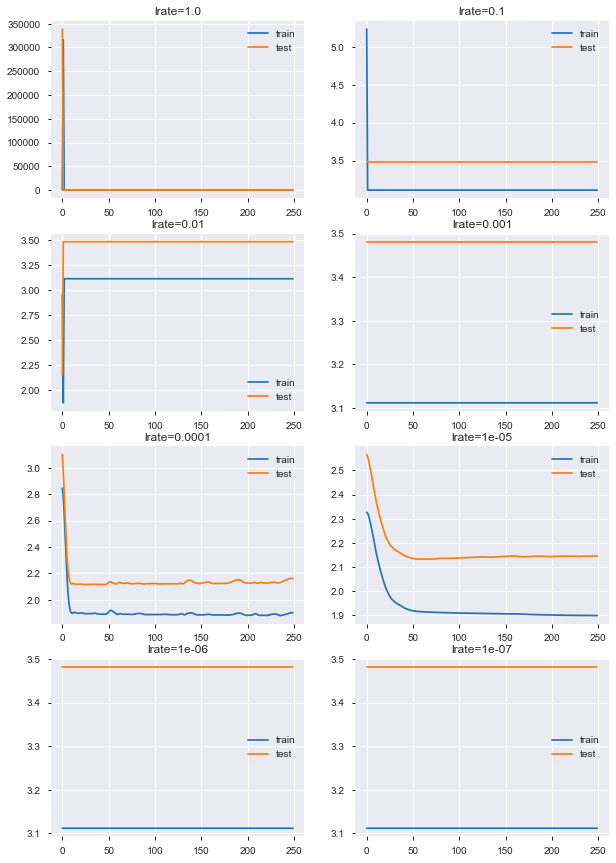

In [45]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7] # use learning rate values between 0.0 to 1.0
plt.figure(figsize=(10, 15))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    tuning_lrate(X_train, y_train, X_test, y_test, learning_rates[i])

# show learning curves
plt.show()

# Tuning Momentum

In [46]:
# fit a model and plot learning curve
def tuning_moment(X_train, y_train, X_test, y_test, moment):
    # define model
    model = Sequential()
    model.add(Dense(100, input_dim=14, activation='relu', kernel_initializer='normal'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='relu'))

    # compile model
    opt = SGD(lr=0.001, momentum=moment)
    model.compile(loss='mse', optimizer=opt)
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, verbose=0, batch_size=400)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('moment='+str(moment))
    plt.legend()

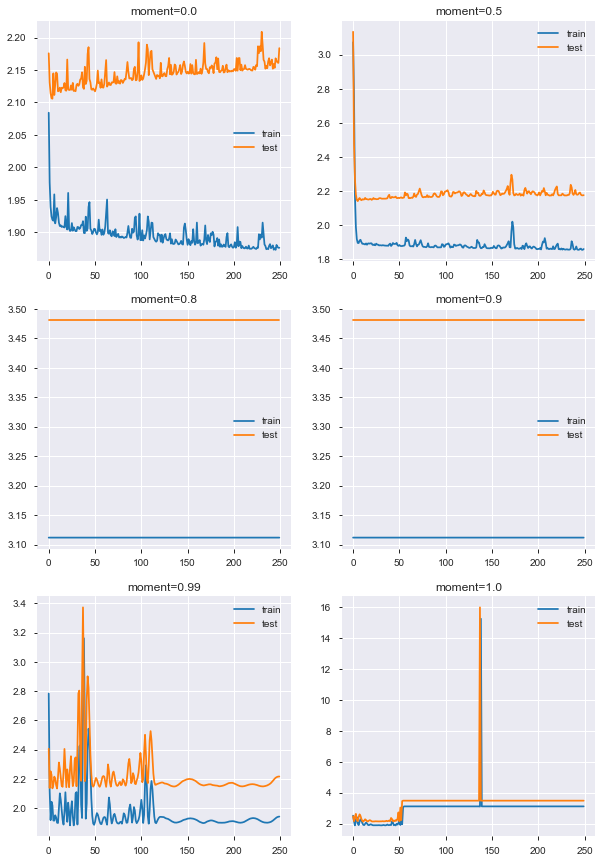

In [47]:
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.8, 0.9, 0.99, 1.0] # use momentum values close to 1.0
plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 320 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    tuning_moment(X_train, y_train, X_test, y_test, momentums[i])

# show learning curves
plt.show()

# Tuning Decay

In [48]:
# fit a model and plot learning curve
def tuning_decay(X_train, y_train, X_test, y_test, decay):
    # define model
    model = Sequential()
    model.add(Dense(100, input_dim=14, activation='relu', kernel_initializer='normal'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='relu'))

    # compile model
    opt = SGD(lr=0.001, momentum=0.99,decay=decay)
    model.compile(loss='mse', optimizer=opt)
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, verbose=0, batch_size=400)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('decay='+str(decay))
    plt.legend()

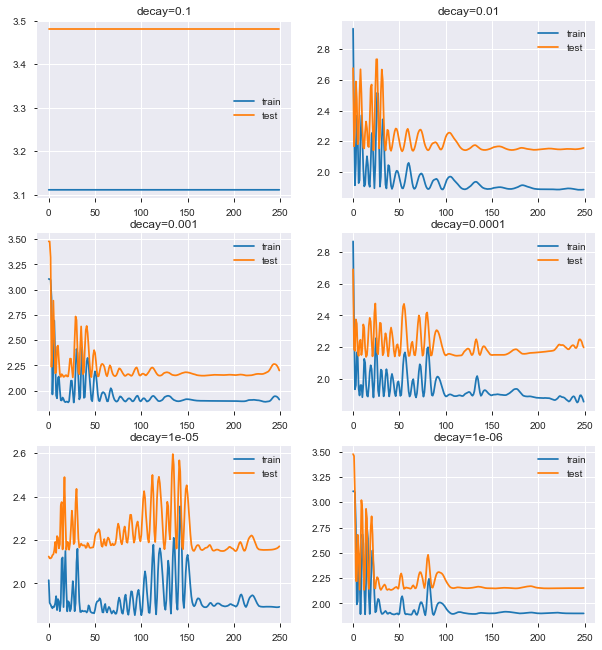

In [49]:
# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4,1E-5,1E-6]
plt.figure(figsize=(10, 15))
for i in range(len(decay_rates)):

    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a decay rate
    tuning_decay(X_train, y_train, X_test, y_test, decay_rates[i])

# show learning curves
plt.show()

# Tuning Epochs after tuning decay

In [52]:
# fit a model and plot learning curve
def tuning_epochs_after_decay(X_train, y_train, X_test, y_test, n_epoch):
    # define model
    model = Sequential()
    model.add(Dense(100, input_dim=14, activation='relu', kernel_initializer='normal'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='relu'))

    # compile model
    opt = SGD(lr=0.001, momentum=0.99,decay=1E-5)
    model.compile(loss='mse', optimizer=opt)
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_epoch, verbose=0, batch_size=400)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('epoch='+str(n_epoch))
    plt.legend()

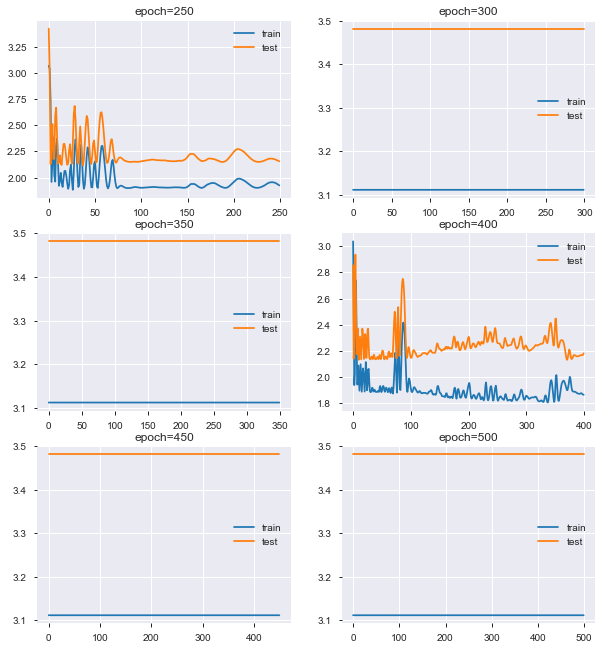

In [53]:
# create learning curves for different batch sizes
epochs = [250,300,350,400,450,500]

plt.figure(figsize=(10, 15))
for i in range(len(epochs)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    tuning_epochs_after_decay(X_train, y_train, X_test, y_test, epochs[i])

# show learning curves
plt.show()

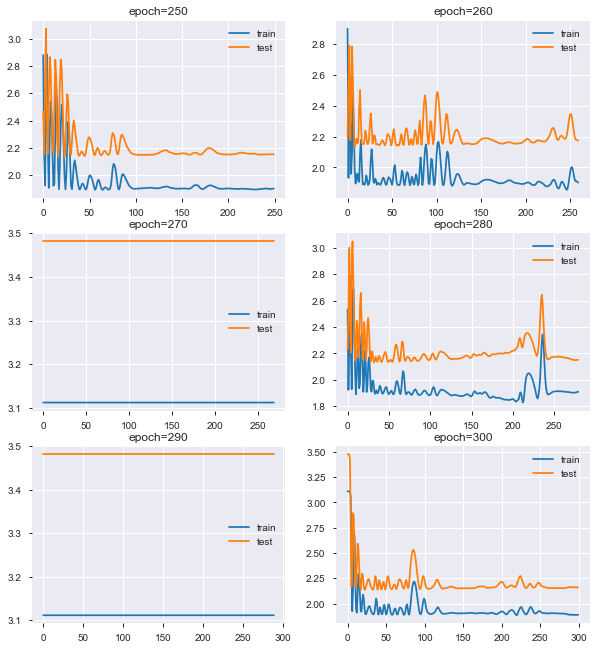

In [54]:
# create learning curves for different batch sizes
epochs = [250,260,270,280,290,300]

plt.figure(figsize=(10, 15))
for i in range(len(epochs)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    tuning_epochs_after_decay(X_train, y_train, X_test, y_test, epochs[i])

# show learning curves
plt.show()

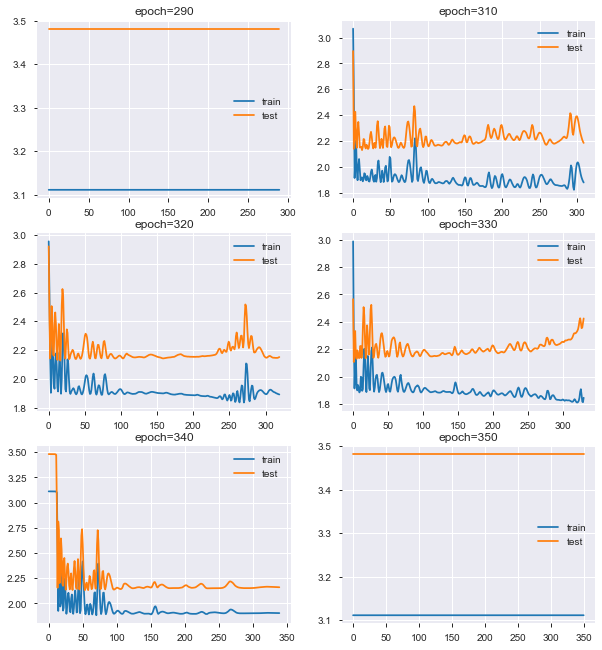

In [55]:
# create learning curves for different batch sizes
epochs = [290,310,320,330,340,350]

plt.figure(figsize=(10, 15))
for i in range(len(epochs)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    tuning_epochs_after_decay(X_train, y_train, X_test, y_test, epochs[i])

# show learning curves
plt.show()

# Tuning Optimizer

In [56]:
# fit a model and plot learning curve
def tuning_optimizer(X_train, y_train, X_test, y_test, optim):
    # define model
    model = Sequential()
    model.add(Dense(100, input_dim=14, activation='relu', kernel_initializer='normal'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='relu'))

    # compile model
    opt = SGD(lr=0.001, momentum=0.99,decay=1E-5)
    model.compile(loss='mse', optimizer=optim)
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=330, verbose=0, batch_size=400)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Optimizer='+str(optim))
    plt.legend()

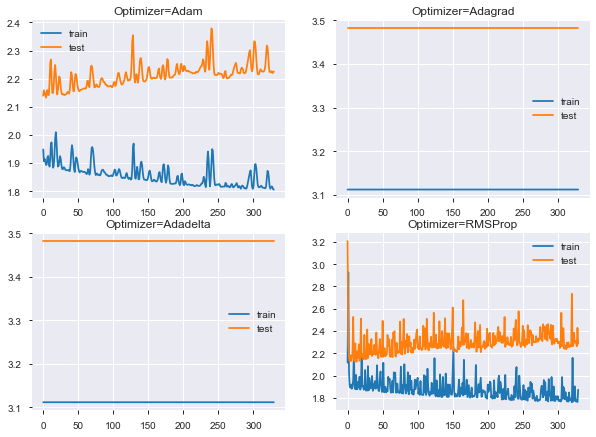

In [57]:
# create learning curves for different batch sizes
opt = ["Adam","Adagrad","Adadelta","RMSProp"]

plt.figure(figsize=(10, 15))
for i in range(len(opt)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a batch size
    tuning_optimizer(X_train, y_train, X_test, y_test, opt[i])

# show learning curves
plt.show()

# Tuning Patience for Early Stopping

In [58]:
def tuing_patience_early_stopping(X_train, y_train, X_test, y_test, pati):
    # init model
    model = Sequential()
    model.add(Dense(100, input_dim=14, activation='relu', kernel_initializer='normal'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='relu'))
    #Optimizer
    opt = SGD(lr=0.001, momentum=0.99,decay=1E-5)
    model.compile(loss='mse', optimizer="adam")
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=pati)
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4000, verbose=0, callbacks=[es])
    # plot training history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='valid')
    plt.legend()
    plt.title('Patience='+str(pati))
    plt.show()

Epoch 00101: early stopping


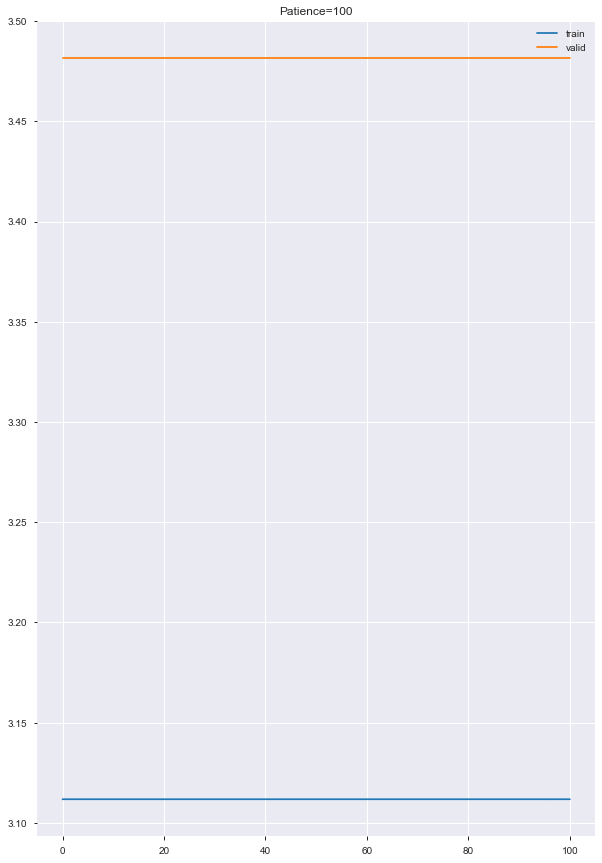

Epoch 00201: early stopping


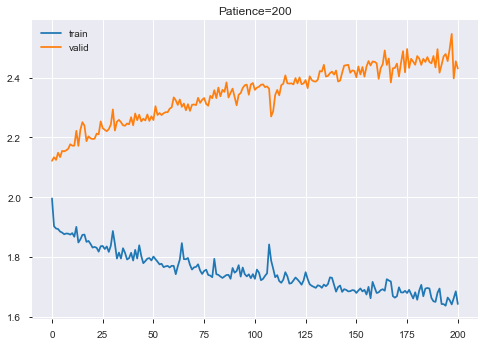

Epoch 00301: early stopping


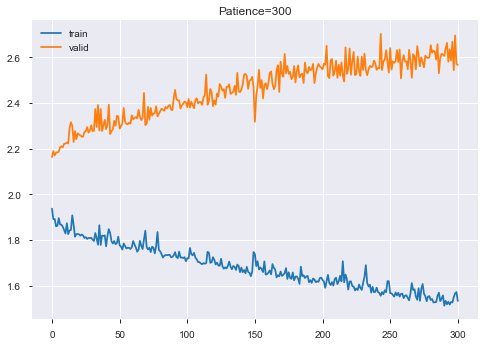

In [59]:
# create learning curves for different batch sizes
pat = [100,200,300]

plt.figure(figsize=(10, 15))
for i in range(len(pat)):
    # determine the plot number
    # fit model and plot learning curves for a batch size
    tuing_patience_early_stopping(X_train, y_train, X_test, y_test, pat[i])

# show learning curves
plt.show()

Epoch 00401: early stopping


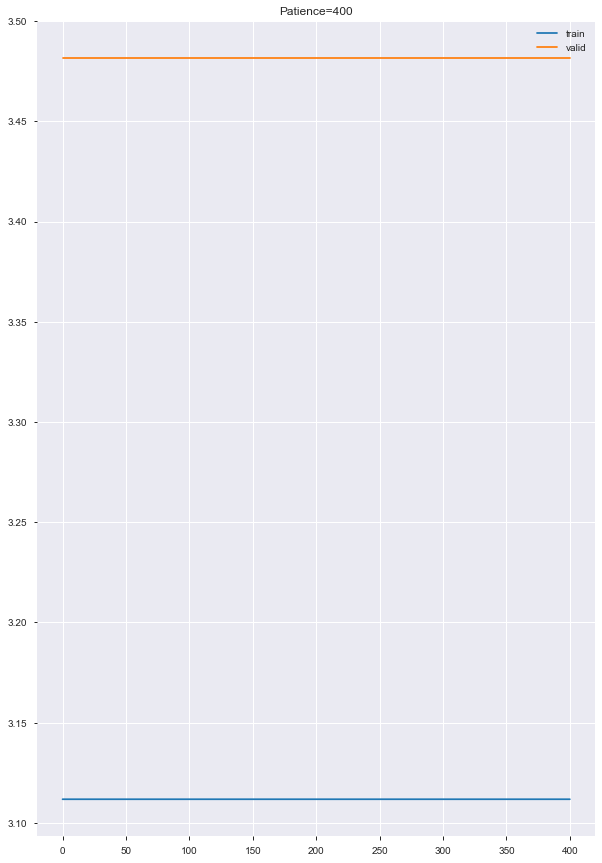

Epoch 00503: early stopping


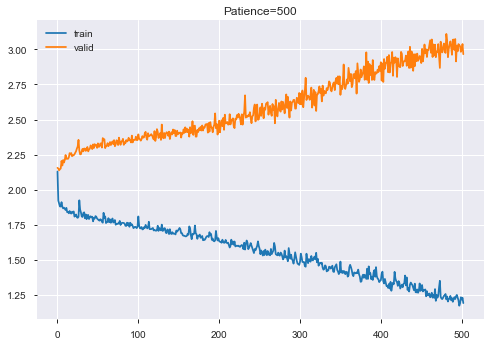

Epoch 00601: early stopping


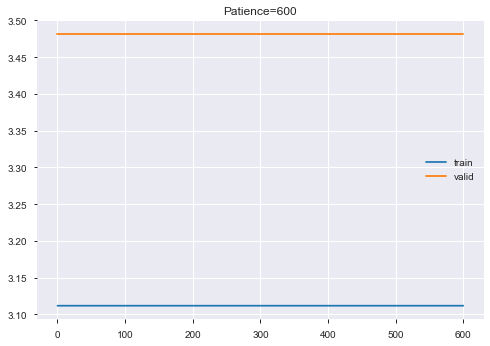

In [60]:
# create learning curves for different batch sizes
pat = [400,500,600]

plt.figure(figsize=(10, 15))
for i in range(len(pat)):
    # determine the plot number
    # fit model and plot learning curves for a batch size
    tuing_patience_early_stopping(X_train, y_train, X_test, y_test, pat[i])

# show learning curves
plt.show()

# Final Model

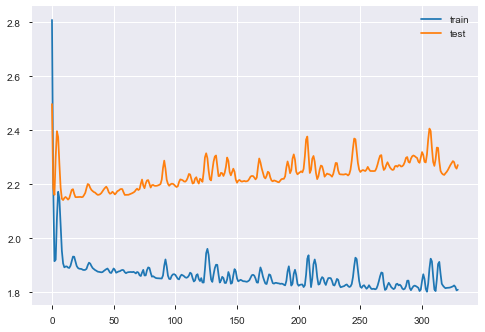

In [61]:
# define model
model = Sequential()
model.add(Dense(100, input_dim=14, activation='relu', kernel_initializer='normal'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile model
opt = SGD(lr=0.001, momentum=0.99,decay=1E-5)
model.compile(loss='mse', optimizer='adam')

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=330, verbose=0, batch_size=400)

# plot learning curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [62]:
model.summary()

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_237 (Dense)            (None, 100)               1500      
_________________________________________________________________
dense_238 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_239 (Dense)            (None, 1)                 51        
Total params: 6,601
Trainable params: 6,601
Non-trainable params: 0
_________________________________________________________________


# Prediction

In [63]:
y_pred=model.predict(X_test)
y_pred=np.expm1(y_pred)

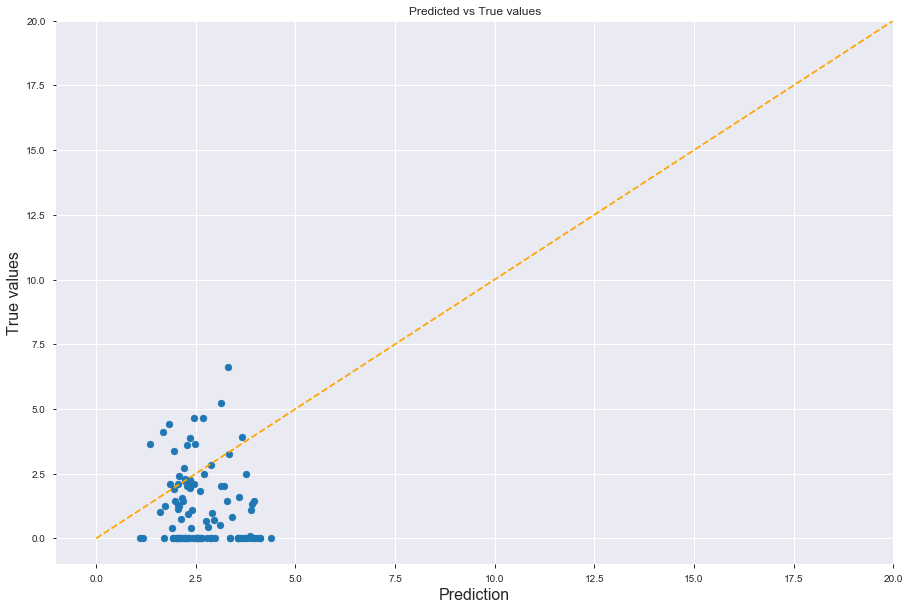

Mean Squared Error :  5.277123563213713


In [64]:
# plot the results
n=20
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(0,n,n), np.linspace(0,n,n), c = 'orange', linestyle='--')
plt.xlabel('Prediction', size=16)
plt.ylabel('True values',size=16)
plt.xlim(-1,n)
plt.ylim(-1,n)
plt.title('Predicted vs True values')
plt.show()
print("Mean Squared Error : ",mean_squared_error(y_pred, y_test))